***Assignment 3***

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [62]:
dataa = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
dataa.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [63]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)
dataa.groupby(['MaritalDesc', 'Sex']).agg(min_salary = ('Salary', 'min'), median_salary = ('Salary', 'median'), max_salary = ('Salary', 'max'), average_salary = ('Salary', 'mean'))

min_salary  median_salary  max_salary  average_salary
MaritalDesc Sex                                                       
Divorced    F         45069        59393.0       68182    57345.500000
            M         45115        63738.5      148999    72520.857143
Married     F         45433        62662.0      250000    69638.986111
            M         46120        63370.5      157000    70089.038462
Separated   F         52984        60627.0       66149    60658.888889
            M         64397        70468.0       74417    69760.666667
Single      F         45395        62068.0      220450    68988.266667
            M         46428        63055.5      178000    71340.048387
Widowed     F         45046        63303.5      107226    69719.750000
            M         52788        61359.0       67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [64]:
#code here
hasil = dataa.groupby('TermReason').agg(total_termination = ('TermReason', 'count'))
hasil.sort_values(by=['total_termination'], ascending = False).head()

,total_termination
TermReason,
N/A-StillEmployed,207
Another position,20
unhappy,14
more money,11
career change,9


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [65]:
#code here
exceeds = dataa.loc[(dataa['PerformanceScore'] == 'Exceeds')]
exceeds.groupby('RecruitmentSource').agg(total_recruit = ('RecruitmentSource', 'count')).sort_values(by=['total_recruit'], ascending = False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [66]:
#code here
dataa.groupby('Department').agg(ManagerName = ('ManagerName', 'nunique'))

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?. 
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [67]:
#code here
dataa.groupby(['Sex'])['Termd'].value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

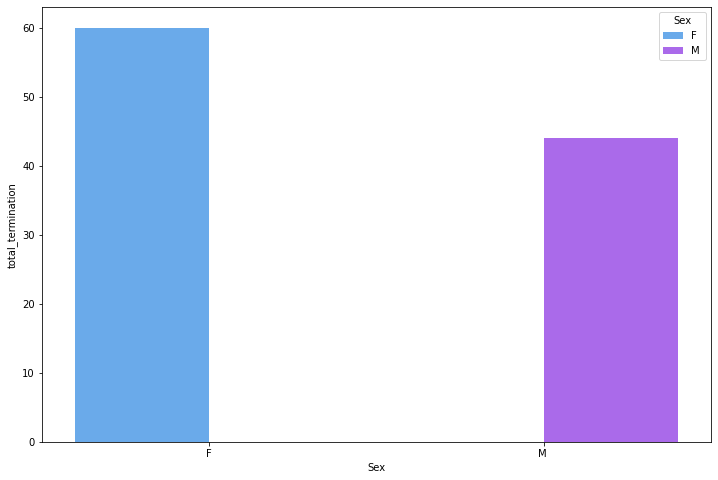

In [68]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = dataa.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

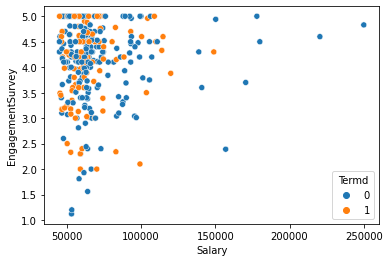

In [69]:
#code here
sns.scatterplot(data=dataa, x='Salary', y='EngagementSurvey', hue='Termd')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

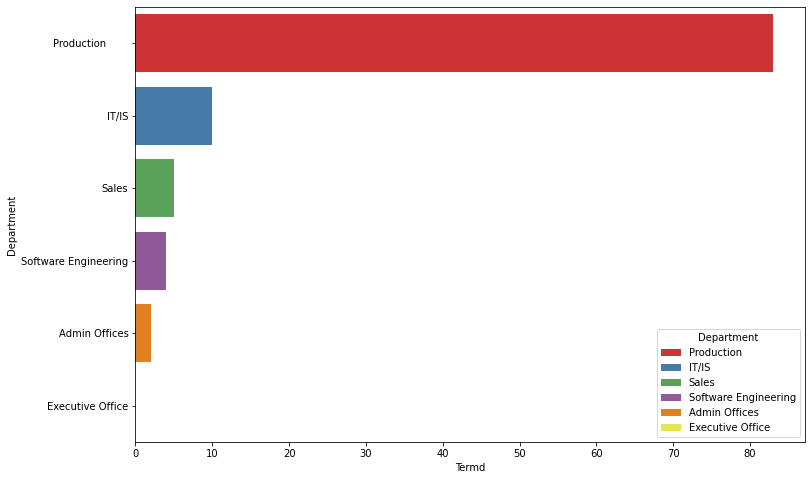

In [70]:
term = dataa.groupby(by=['Department']).agg({'Termd': 'sum'}).sort_values('Termd', ascending=False).reset_index()\

f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.barplot(x='Termd', y='Department', hue='Department', data=term, palette='Set1', dodge=False)

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

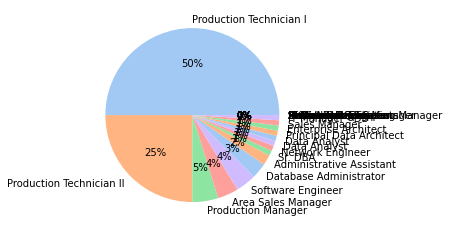

In [71]:
t = dataa.groupby(by=['Position']).agg({'Termd':'sum'}).sort_values('Termd', ascending=False).reset_index()

x = t['Termd'].values
y = t['Position'].values

colors = sns.color_palette('pastel')[0:5]

plt.pie(x, labels=y, colors=colors, autopct='%.0f%%')
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd 
(5 points)

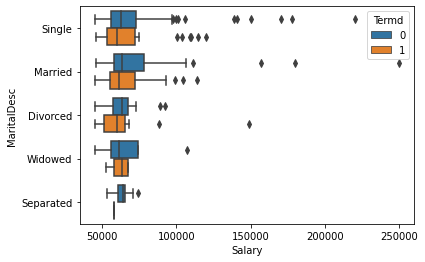

In [72]:
#code here
df = sns.boxplot(data=dataa, x='Salary', y='MaritalDesc', hue='Termd')


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


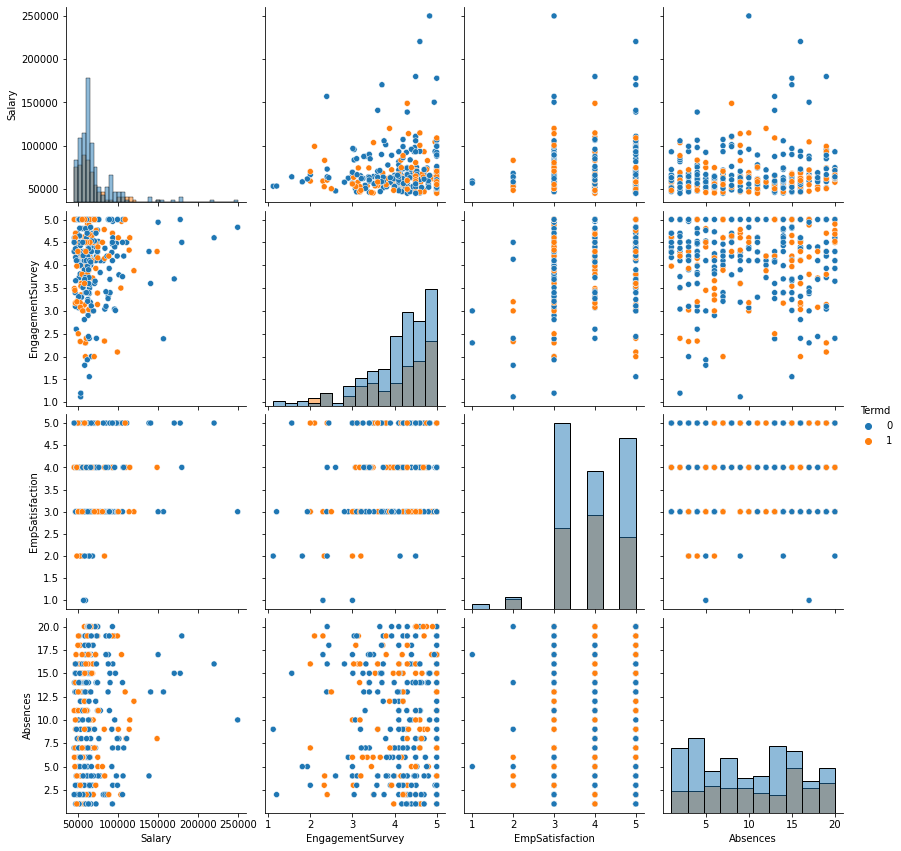

In [73]:
#codde here
print('Pairplot')
sns.pairplot(data=dataa[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [74]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
DOB_date = pd.to_datetime(dataa['DOB'])
tahun = DOB_date.dt.strftime('%Y')
age = []

for i in range(len(tahun)):
  umur = 2022 - int(tahun[i])
  age.append(umur)

data = {'DOB' : dataa['DOB'], 'DOB_date' : DOB_date, 'Age' : age}
df = pd.DataFrame(data)
df

,DOB,DOB_date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33
...,...,...,...
306,05/11/85,1985-05-11,37
307,05/04/82,1982-05-04,40
308,08/30/79,1979-08-30,43
309,02/24/79,1979-02-24,43


In [75]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

scaler = MinMaxScaler()
data[['Salary_minmax']] = scaler.fit_transform(data[['Salary']])
data = data[['Salary', 'Salary_minmax']]
display(data)

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197
...,...,...
306,65893,0.101716
307,48513,0.016916
308,220450,0.855821
309,89292,0.215883


In [76]:
# 13. Ubahlah semua tipe data object menjadi category
# 5 point
for i in dataa.columns:
  if(dataa[i].dtypes == "object"):
    dataa[i] = dataa[i].astype("category")

dataa.dtypes

Employee_Name                 category
EmpID                            int64
MarriedID                        int64
MaritalStatusID                  int64
GenderID                         int64
EmpStatusID                      int64
DeptID                           int64
PerfScoreID                      int64
FromDiversityJobFairID           int64
Salary                           int64
Termd                            int64
PositionID                       int64
Position                      category
State                         category
Zip                              int64
DOB                           category
Sex                           category
MaritalDesc                   category
CitizenDesc                   category
HispanicLatino                category
RaceDesc                      category
DateofHire                    category
DateofTermination             category
TermReason                    category
EmploymentStatus              category
Department               

In [77]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

from sklearn.preprocessing import LabelEncoder
label_recruit = LabelEncoder()
dataa["RecruitmentSource"] = label_recruit.fit_transform(dataa["RecruitmentSource"])

In [78]:
#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point

from sklearn.preprocessing import LabelEncoder
label_perform = LabelEncoder()
dataa["PerformanceScore"] = label_perform.fit_transform(dataa["PerformanceScore"])


In [79]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
y = dataa.Termd

#Independent Variable (feature)
x = dataa[["MarriedID", "MaritalStatusID", "GenderID", "DeptID", "PerfScoreID", "PositionID", "RecruitmentSource", "PerformanceScore",  "Absences", "SpecialProjectsCount", "EmpSatisfaction", "EngagementSurvey" ]]

df = pd.concat([y, x], axis =1)

df.head()

,Termd,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,RecruitmentSource,PerformanceScore,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,0,1,5,4,19,5,0,1,0,5,4.60
1,1,1,1,1,3,3,27,4,1,17,6,3,4.96
2,1,1,1,0,5,3,20,5,1,3,0,3,3.02
3,0,1,1,0,5,3,19,4,1,15,0,5,4.84
4,1,0,2,0,5,3,19,3,1,2,0,4,5.00


In [80]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

k = 3
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

y_predict = knn.predict(X_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        41
           1       0.55      0.50      0.52        22

    accuracy                           0.68        63
   macro avg       0.65      0.64      0.64        63
weighted avg       0.68      0.68      0.68        63



# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br> 
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

Jawaban 19

Dilihat dari data di bawah ini, maka dapat disimpulkan bahwa terdapat relasi antara manager dengan performance score. Manager bernama Debra Houlihan memiliki skor kinerja pegawai paling tinggi dibandingkan dengan yang lain

In [56]:
dataa.groupby('ManagerName').agg(Performance_Score = ('PerformanceScore', 'mean'))

,Performance_Score
ManagerName,
Alex Sweetwater,0.888889
Amy Dunn,1.095238
Board of Directors,1.000000
Brandon R. LeBlanc,1.000000
Brannon Miller,1.090909
Brian Champaigne,1.000000
David Stanley,1.000000
Debra Houlihan,1.333333
Elijiah Gray,1.000000


Jawaban 20



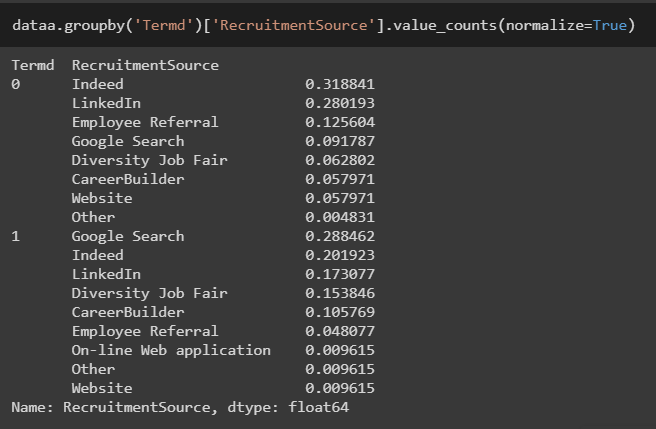

Berdasarkan data di atas, maka dapat disimpulkan bahwa perekrutan terbaik jika ingin memastikan rasio hubungan kerja yang rendah adalah melalui website